<a href="https://colab.research.google.com/github/Kalyani-235/fmmllabs/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import the data set and do tha data preprocessing

In [2]:
#problem statement
#develop a staement analysis model to classify reviews as positive or negative
#preprocess the review text using techniques such as lower casting ,removing stop words and lemmatization

In [3]:
import pandas as pd

In [4]:
data = pd.read_csv('/content/Reviews.csv')

In [5]:
print(data)

                                                Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]


In [6]:
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [7]:
data.head(10)

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


In [8]:
data.tail()

,Review,Liked
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [9]:
data.info() #data set info like data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [10]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [11]:
data.isnull().sum()

Review    0
Liked     0
dtype: int64

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
from wordcloud import WordCloud

In [14]:
combined_text = "".join(data['Review'])  #combine all review text into one string

In [15]:
wordcloud = WordCloud(width = 800 ,height = 400 ,background_color = 'white').generate(combined_text)

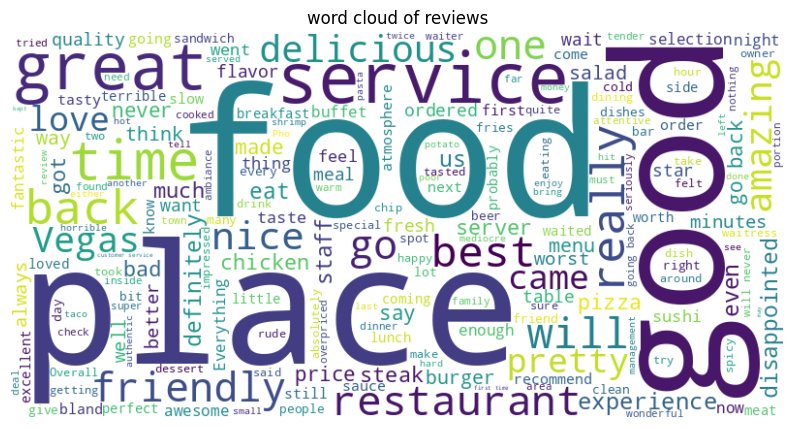

In [16]:
#plotthe word cloud
plt.figure(figsize=(10,6))
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.title('word cloud of reviews')
plt.show()

In [17]:
from collections import Counter

In [18]:
targeted_words = ['good','great','amazing','bad','not bad']
all_words = "".join(data['Review']).lower().split() #flatten reviews into a single list of words
word_counts = Counter(all_words)
target_word_count = {word: word_counts[word]for word in targeted_words}

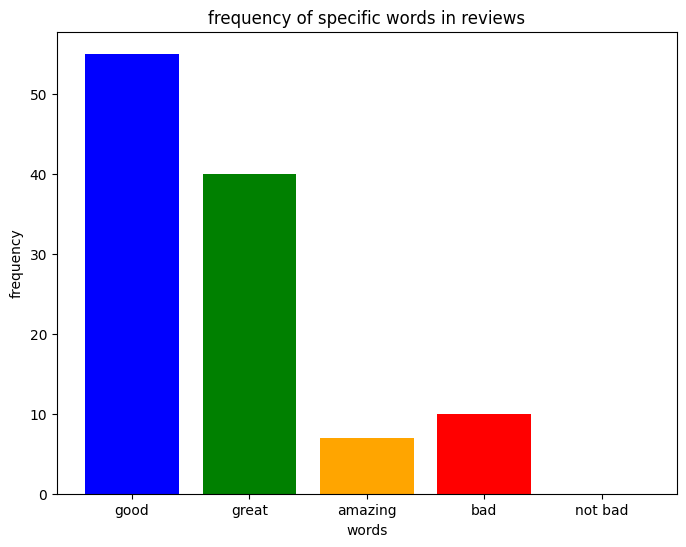

In [19]:
#plotting
plt.figure(figsize=(8,6))
plt.bar(target_word_count.keys(), target_word_count.values() , color =['blue','green','orange','red','pink'])
plt.xlabel('words')
plt.ylabel('frequency')
plt.title('frequency of specific words in reviews')
plt.show()

In [20]:
#Text preprocessing

In [21]:
#converting a dataset into lowercased
lowercased_text = data['Review'].str.lower()
print(lowercased_text)

0                               wow... loved this place.
1                                     crust is not good.
2              not tasty and the texture was just nasty.
3      stopped by during the late may bank holiday of...
4      the selection on the menu was great and so wer...
                             ...                        
995    i think food should have flavor and texture an...
996                             appetite instantly gone.
997    overall i was not impressed and would not go b...
998    the whole experience was underwhelming, and i ...
999    then, as if i hadn't wasted enough of my life ...
Name: Review, Length: 1000, dtype: object


In [22]:
#tokenization
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [23]:
data['Tokens'] = data['Review'].apply(word_tokenize)
print(data['Tokens'])

0                      [Wow, ..., Loved, this, place, .]
1                              [Crust, is, not, good, .]
2      [Not, tasty, and, the, texture, was, just, nas...
3      [Stopped, by, during, the, late, May, bank, ho...
4      [The, selection, on, the, menu, was, great, an...
                             ...                        
995    [I, think, food, should, have, flavor, and, te...
996                       [Appetite, instantly, gone, .]
997    [Overall, I, was, not, impressed, and, would, ...
998    [The, whole, experience, was, underwhelming, ,...
999    [Then, ,, as, if, I, had, n't, wasted, enough,...
Name: Tokens, Length: 1000, dtype: object


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
 2   Tokens  1000 non-null   object
dtypes: int64(1), object(2)
memory usage: 23.6+ KB


In [25]:
#removing stop words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [26]:
stop_words = set(stopwords.words('english'))

In [27]:
data['Tokens'] = data['Review'].apply(lambda x: [word for word in word_tokenize(x) if word not in stop_words])

In [28]:
print(data['Tokens'])

0                            [Wow, ..., Loved, place, .]
1                                       [Crust, good, .]
2                        [Not, tasty, texture, nasty, .]
3      [Stopped, late, May, bank, holiday, Rick, Stev...
4               [The, selection, menu, great, prices, .]
                             ...                        
995        [I, think, food, flavor, texture, lacking, .]
996                       [Appetite, instantly, gone, .]
997          [Overall, I, impressed, would, go, back, .]
998    [The, whole, experience, underwhelming, ,, I, ...
999    [Then, ,, I, n't, wasted, enough, life, ,, pou...
Name: Tokens, Length: 1000, dtype: object


In [29]:
# stemming
from nltk.stem import PorterStemmer

In [30]:
stemmer = PorterStemmer()

In [31]:
data['stemmed'] = data['Review'].apply(lambda x: "".join(stemmer.stem(word) for word in word_tokenize(x)))

In [32]:
print(data['Tokens'])

0                            [Wow, ..., Loved, place, .]
1                                       [Crust, good, .]
2                        [Not, tasty, texture, nasty, .]
3      [Stopped, late, May, bank, holiday, Rick, Stev...
4               [The, selection, menu, great, prices, .]
                             ...                        
995        [I, think, food, flavor, texture, lacking, .]
996                       [Appetite, instantly, gone, .]
997          [Overall, I, impressed, would, go, back, .]
998    [The, whole, experience, underwhelming, ,, I, ...
999    [Then, ,, I, n't, wasted, enough, life, ,, pou...
Name: Tokens, Length: 1000, dtype: object


In [33]:
print(data['stemmed'])

0                                    wow...lovethiplace.
1                                        crustisnotgood.
2                       nottastiandthetexturwajustnasti.
3      stopbydurethelatemaybankholidayoffricksteverec...
4            theselectonthemenuwagreatandsoweretheprice.
                             ...                        
995    ithinkfoodshouldhaveflavorandtexturandbothwere...
996                                appetitinstantligone.
997                overaliwanotimpressandwouldnotgoback.
998    thewholeexperiwaunderwhelm,andithinkwe'lljustg...
999    then,asifihadn'twastenoughofmylifethere,theypo...
Name: stemmed, Length: 1000, dtype: object


In [34]:
data['stemmed'].value_counts()

stemmed
#name?                                                                                                  4
thefoodwaterribl.                                                                                       2
iwouldnotrecommendthiplace.                                                                             2
ilovethiplace.                                                                                          2
iwon'tbeback.                                                                                           2
                                                                                                       ..
omg,thefoodwadelicioso!                                                                                 1
thereisnothauthentaboutthiplace.                                                                        1
thespaghettiisnothspecialwhatsoev.                                                                      1
ofallthedish,thesalmonwathebest,butall

In [35]:
#lemmatization
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [36]:
from nltk.stem import WordNetLemmatizer

In [37]:
lemmatizer = WordNetLemmatizer()

In [40]:
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

# Ensure you have downloaded the necessary NLTK data
import nltk
nltk.download('punkt')
nltk.download('wordnet')

# Sample data
data = pd.DataFrame({'Review': ["This is a test sentence.", "Another review goes here."]})

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Apply lemmatization to the 'Review' column
data['Lemmatized'] = data['Review'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word, pos=wordnet.VERB) for word in word_tokenize(x)]))

print(data)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                      Review                 Lemmatized
0   This is a test sentence.  This be a test sentence .
1  Another review goes here.   Another review go here .


In [41]:
print(data['Lemmatized'])

0    This be a test sentence .
1     Another review go here .
Name: Lemmatized, dtype: object


In [42]:
#remove the numbers
import re
data['No_Numbers'] = data['Review'].apply(lambda x :re.sub(r'/d+',' ',x))

In [43]:
print(data['No_Numbers'])

0     This is a test sentence.
1    Another review goes here.
Name: No_Numbers, dtype: object


In [44]:
data['cleaned_text'] = data['Review'].apply(lambda x:re.sub(r'[^A-Za-z0-9\s]',' ',x))

In [45]:
print(data['cleaned_text'])

0     This is a test sentence 
1    Another review goes here 
Name: cleaned_text, dtype: object


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Review        2 non-null      object
 1   Lemmatized    2 non-null      object
 2   No_Numbers    2 non-null      object
 3   cleaned_text  2 non-null      object
dtypes: object(4)
memory usage: 192.0+ bytes


In [47]:
#normalization
!pip install contractions
import contractions
data['expanded'] = data['Review'].apply(contractions.fix)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 18.0 MB/s eta 0:00:00


In [48]:
print(data['expanded'])

0     This is a test sentence.
1    Another review goes here.
Name: expanded, dtype: object


In [49]:
!pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 5.4 MB/s eta 0:00:00


In [50]:
import emoji
data['emoji'] = data['Review'].apply(emoji.demojize)
print(data['emoji'])

0     This is a test sentence.
1    Another review goes here.
Name: emoji, dtype: object


In [51]:
#Removing HTMLtags
!pip install beautifulsoup4
from bs4 import BeautifulSoup

In [52]:

from bs4 import BeautifulSoup

# Sample DataFrame
data = pd.DataFrame({
    'Review': ['<p>This is a sample review.</p>', '<div>Another review here!</div>']
})

# Clean HTML tags
data['Cleaned'] = data['Review'].apply(lambda x: BeautifulSoup(x, "html.parser").get_text())

print(data['Cleaned'])

0    This is a sample review.
1        Another review here!
Name: Cleaned, dtype: object
